In [39]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Code `get_data()`

## Create _draft code_ in the notebook

In [40]:
# Where am I?
os.getcwd()

'/home/andreza/code/andrezaumbelino/04-Decision-Science/01-Project-Setup/data-olist_data_metric'

In [41]:
import os
import pandas as pd

# Build relative path to csv folder
csv_path = '/home/vincent/code/vtmoreau/04-Decision-Sicence/01-Project-Setup/data-context-and-setup/data/csv' # Bad practice!
csv_path = '../data-context-and-setup/data/csv' # Mac OS / Ubuntu only
csv_path = '..\\data-context-and-setup\\data\\csv' # Windows only
csv_path = os.path.join('..', 'data-context-and-setup','data','csv') # Robust to Linux/OS/Windows variations

csv_path

'../data-context-and-setup/data/csv'

In [42]:
file_names = [f for f in os.listdir(csv_path) if f.endswith('.csv')]
file_names

['olist_products_dataset.csv',
 'product_category_name_translation.csv',
 'olist_geolocation_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_sellers_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_customers_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_orders_dataset.csv']

In [43]:
#.strip() or .replace()
key_names = [key_name
    .replace('olist_','')
    .replace('_dataset','')
    .replace('.csv','')
    for key_name in file_names]
key_names

['products',
 'product_category_name_translation',
 'geolocation',
 'order_reviews',
 'sellers',
 'order_payments',
 'customers',
 'order_items',
 'orders']

In [44]:
# How to iterate over two list simulatenously ?
# Let's discover how zip works :

l1 = ['a','b','c']
l2 = [1,2,3]
list(zip(l1,l2))

[('a', 1), ('b', 2), ('c', 3)]

In [45]:
# Create the dictionary

data = {}

for (k, f) in zip(key_names, file_names):
    data[k] = pd.read_csv(os.path.join(csv_path, f))

data['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


## Transfer logic to `olist/data.py` 🐍

When you call a function that you will name `get_data` from `olist/data.py`, it should return the dictionary `data`:with key/value pairs `"name of the dataset":"dataset.csv"`

```python
from olist.data import Olist
Olist().get_data()
```
- Take your time to understand what happens when calling `Olist().get_data()`
- Your method `get_data()` needs to be callable from various places (e.g your Terminal, this notebook, another notebook located elsewhere, etc...)
- You can't use a relative path this time as the current working directory `os.getcwd()` depends on where you run the code in the first place


In [46]:
# Test your code
from olist.data import Olist
Olist().get_data().keys()

dict_keys(['products', 'product_category_name_translation', 'geolocation', 'order_reviews', 'sellers', 'order_payments', 'customers', 'order_items', 'orders'])

# Let's build a business metric: `Weekly Sales` 📈

<img src="https://wagon-public-datasets.s3.amazonaws.com/04-Decision-Science/01-Project-Setup/olist_schema_v2.png" width=1000>

**Goal**: Plot the weekly sum of `payment_value` for delivered orders

1️⃣ **Step 1**: Pseudo code your process in English below before actually coding

Soma semanal de payment_value. 
1 - Agrupar order_ID e somar payment_value
2 - juntar para cada order_id o order_approved_at
3 - Agrupar por semana 

2️⃣ **Step 2**: Code your logic

In [47]:
data['order_payments']['order_id'].value_counts()

fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
fedcd9f7ccdc8cba3a18defedd1a5547    19
                                    ..
6d2a30c9b7dcee3ed507dc9a601f99e7     1
a7737f6d9208dd56ea498a322ed3c37f     1
646e62df54f3e236eb6d5ff3b31429b8     1
e115da7a49ec2acf622e1f31da65cfb9     1
28bbae6599b09d39ca406b747b6632b1     1
Name: order_id, Length: 99440, dtype: int64

In [48]:
new = data['order_payments'].groupby(['order_id']).sum()
new

,payment_sequential,payment_installments,payment_value
order_id,,,
00010242fe8c5a6d1ba2dd792cb16214,1,2,72.19
00018f77f2f0320c557190d7a144bdd3,1,3,259.83
000229ec398224ef6ca0657da4fc703e,1,5,216.87
00024acbcdf0a6daa1e931b038114c75,1,2,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,1,3,218.04
...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1,1,343.40
fffcd46ef2263f404302a634eb57f7eb,1,1,386.53
fffce4705a9662cd70adb13d4a31832d,1,3,116.85


In [49]:
df_row = new.merge(data['orders'], on='order_id', how='right')
df_row

,order_id,payment_sequential,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,6.0,3.0,38.71,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,1.0,1.0,141.46,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,1.0,3.0,179.12,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,1.0,1.0,72.20,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,1.0,1.0,28.62,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,1.0,3.0,85.08,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1.0,3.0,195.00,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1.0,5.0,271.01,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,1.0,4.0,441.16,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [50]:
df_row1 = df_row[df_row['order_status'] == "delivered"]
df_row1

,order_id,payment_sequential,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,6.0,3.0,38.71,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,1.0,1.0,141.46,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,1.0,3.0,179.12,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,1.0,1.0,72.20,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,1.0,1.0,28.62,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,1.0,3.0,85.08,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1.0,3.0,195.00,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1.0,5.0,271.01,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,1.0,4.0,441.16,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [51]:
new_orders =  df_row1[['order_id','payment_value','order_approved_at','order_purchase_timestamp']]
new_orders

,order_id,payment_value,order_approved_at,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,38.71,2017-10-02 11:07:15,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,141.46,2018-07-26 03:24:27,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,179.12,2018-08-08 08:55:23,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,72.20,2017-11-18 19:45:59,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,28.62,2018-02-13 22:20:29,2018-02-13 21:18:39
...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,85.08,2017-03-09 09:54:05,2017-03-09 09:54:05
99437,63943bddc261676b46f01ca7ac2f7bd8,195.00,2018-02-06 13:10:37,2018-02-06 12:58:58
99438,83c1379a015df1e13d02aae0204711ab,271.01,2017-08-27 15:04:16,2017-08-27 14:46:43
99439,11c177c8e97725db2631073c19f07b62,441.16,2018-01-08 21:36:21,2018-01-08 21:28:27


⌛️ Do not forget to handle `datetime` properly.

In [54]:
new_orders['order_purchase_timestamp'] = pd.to_datetime(new_orders['order_purchase_timestamp'])

/tmp/ipykernel_75505/2176752818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_orders['order_purchase_timestamp'] = pd.to_datetime(new_orders['order_purchase_timestamp'])


In [55]:
new_orders['order_approved_at'] = pd.to_datetime(new_orders['order_approved_at'])

/tmp/ipykernel_75505/4237521876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_orders['order_approved_at'] = pd.to_datetime(new_orders['order_approved_at'])


👉 Set the `order_purchase_timestamp` as the index

In [56]:
new_orders.set_index('order_purchase_timestamp', inplace=True)

👉 You can now resample this dataset to compute metrics on a weekly basis.

In [57]:
new_orders.resample('W').sum() 

,payment_value
order_purchase_timestamp,
2016-09-18,0.00
2016-09-25,0.00
2016-10-02,0.00
2016-10-09,42669.98
2016-10-16,3896.73
...,...
2018-08-05,320204.74
2018-08-12,318700.65
2018-08-19,285766.68


📈 Plot the weekly payment values to get a big picture of Olist's revenues.

<AxesSubplot:xlabel='order_purchase_timestamp'>

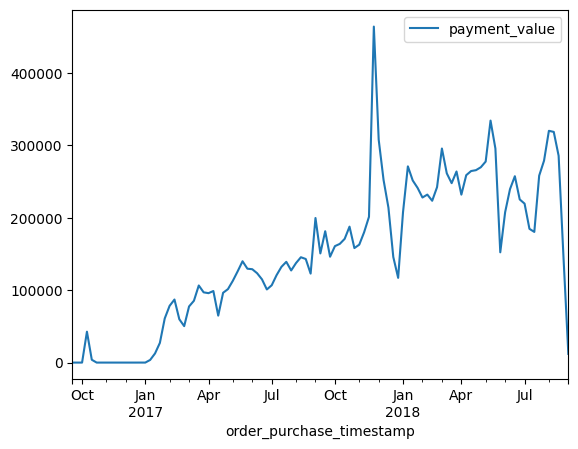

In [58]:
new_orders.resample('W').sum().plot()